In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Настройка рисунков
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

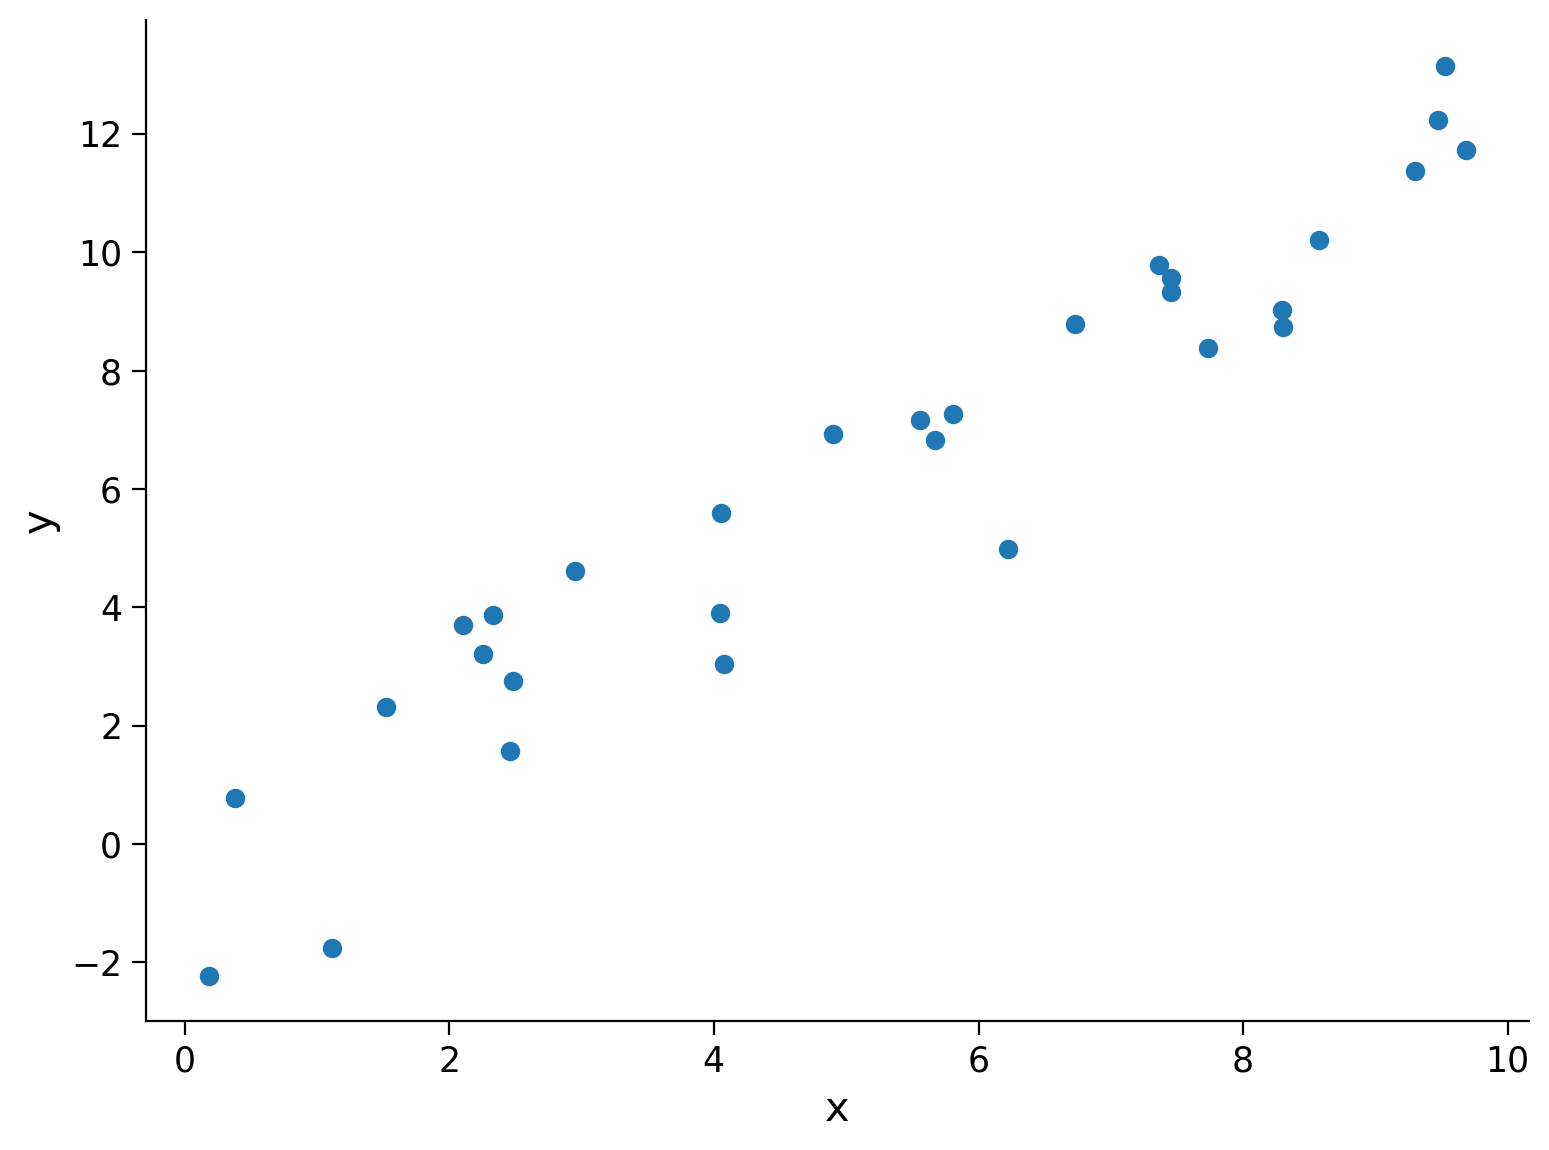

In [4]:
# @title

# @markdown Выполните ячеку для запуска симуляции

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

In [5]:
def mse(x, y, theta_hat):
    """Compute the mean squared error

    Args:
        x (ndarray): An array of shape (samples,) that contains the input values.
        y (ndarray): An array of shape (samples,) that contains the corresponding
            measurement values to the inputs.
        theta_hat (float): An estimate of the slope parameter

    Returns:
        float: The mean squared error of the data with the estimated parameter.
    """

    # Compute the estimated y
    y_hat = theta_hat * x

    # Compute mean squared error
    mse = sum((y - y_hat) ** 2)*(1/n_samples)

    return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
    print(f"theta_hat = {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}")

theta_hat = 0.75, MSE = 9.08
theta_hat = 1.0, MSE = 3.01
theta_hat = 1.5, MSE = 4.52


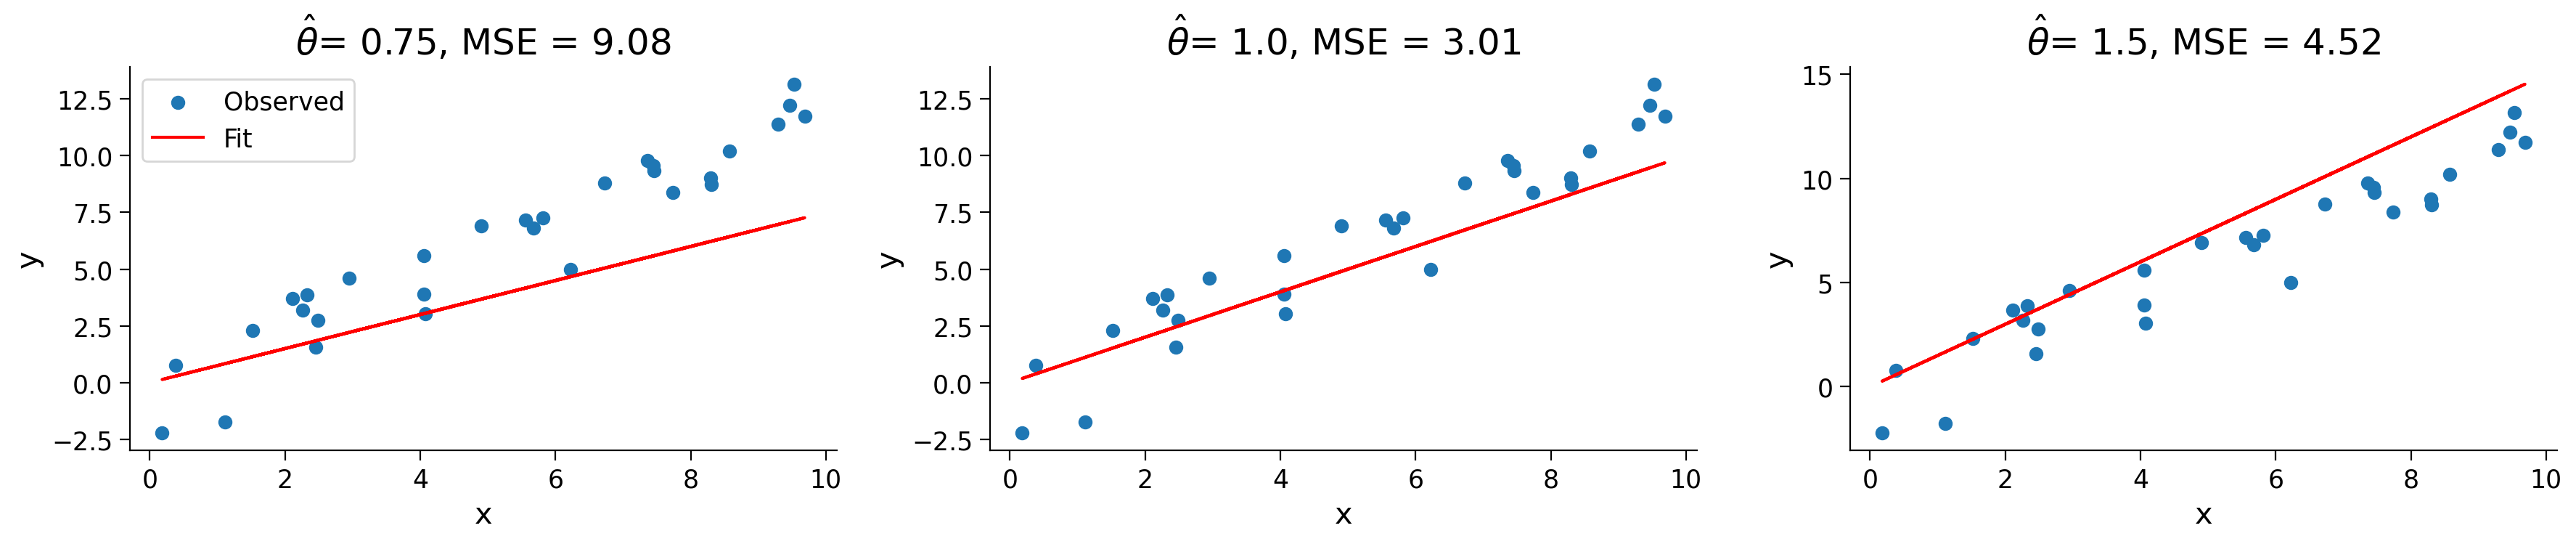

In [6]:
#@title

#@markdown Выполните код в ячейки для отображения качества модели

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

In [7]:
#@title

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)
  plt.show()

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

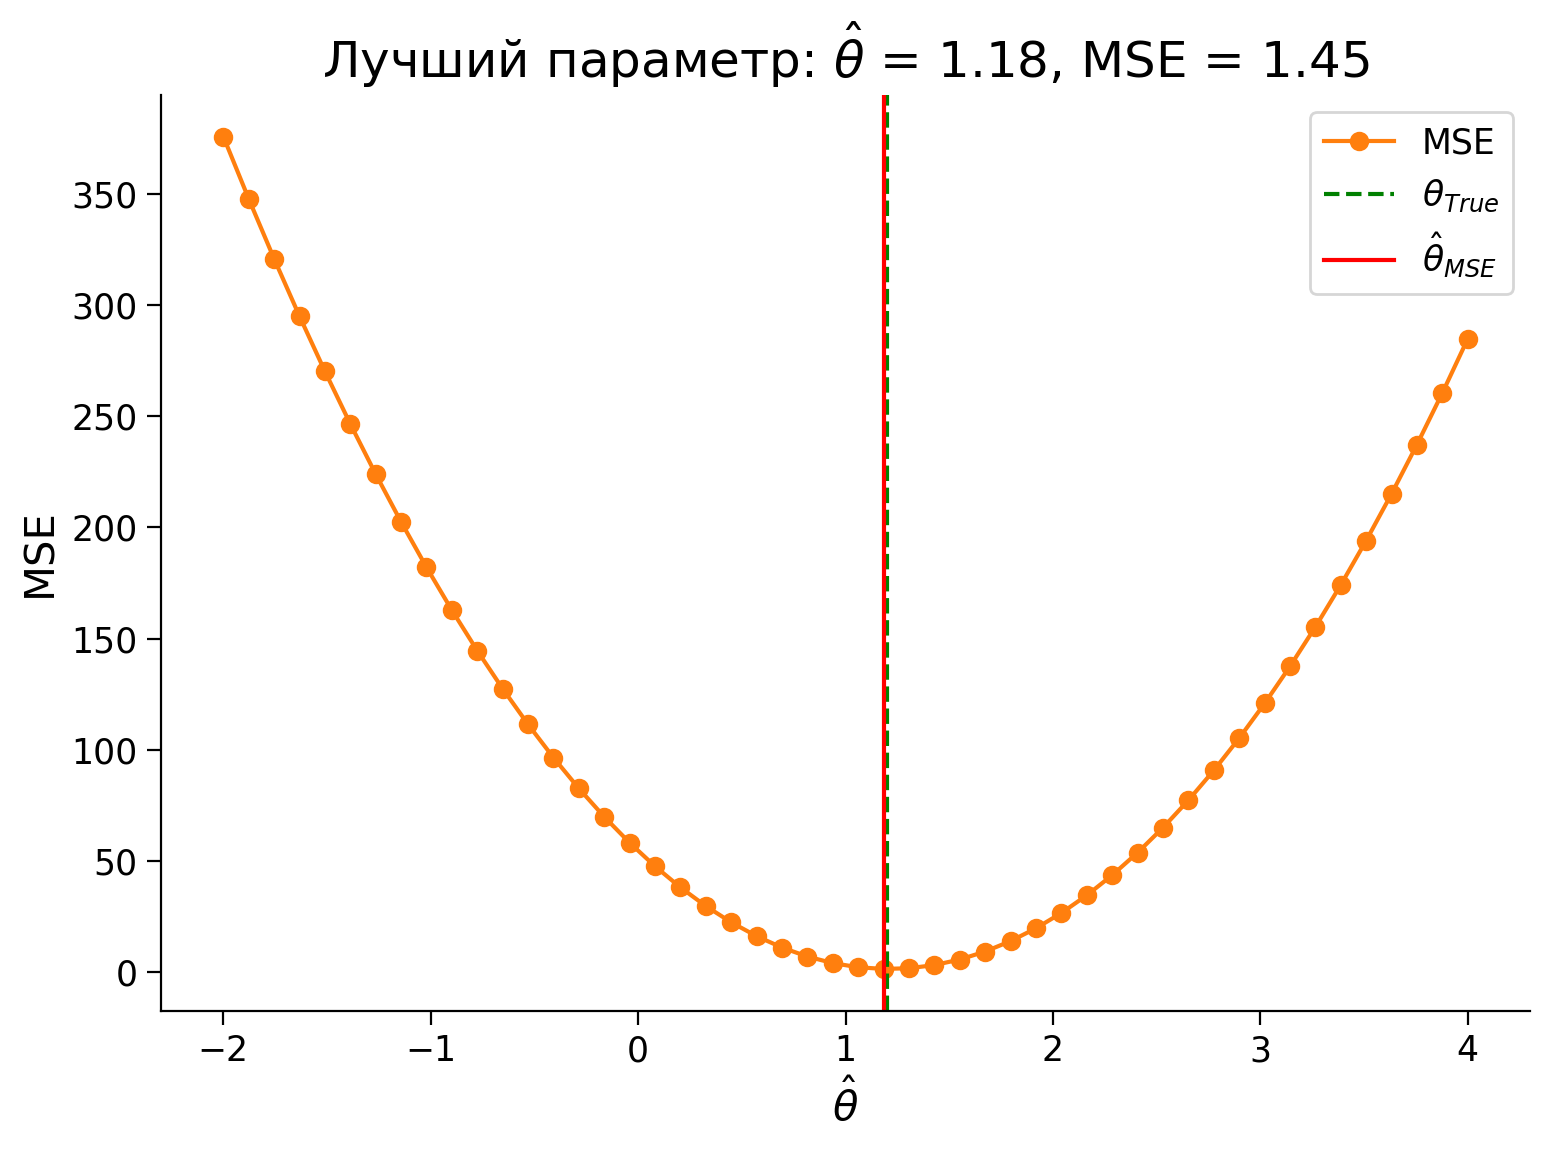

In [8]:
# @title

# @markdown Выполните код, чтобы перебрать theta_hats и для каждого расчитать MSE
# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"Лучший параметр: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

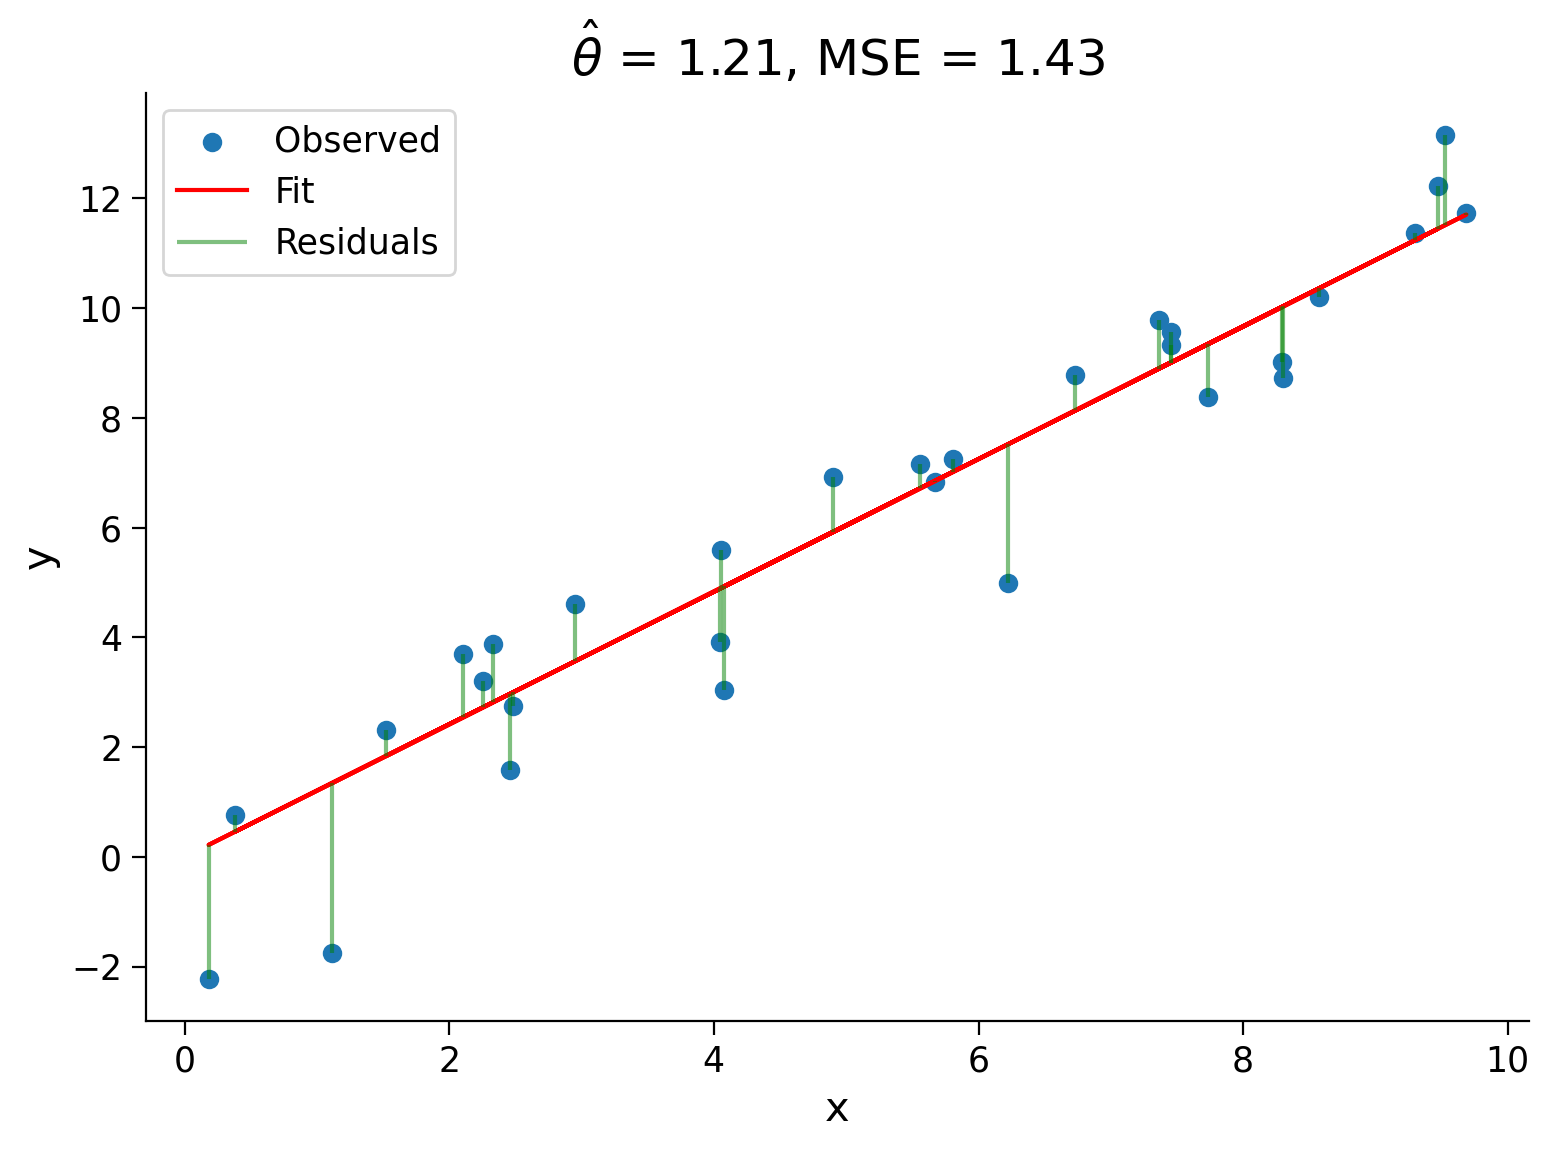

In [9]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (np.dot(x.T, y))/(np.dot(x.T, x))   #(sum(x*y)/(x**2))
  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)